Marco Reina 7066486

Samuele Serri 7069839

# Assignment 1 - Linear Regression

In this assigment you will be coding for a Linear Regression task hands-on. (10 Points)

The notebook uses some popular libraries. If your environment is missing any of these libraries, you can install them using the following `pip` commands:

```bash
!pip install matplotlib seaborn scikit-learn


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
#make sizes bigger for readability
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 17})
plt.rcParams["figure.figsize"] = (12,12)

## Load and Explore Data

In [3]:
# Load the California Housing dataset
housing = fetch_california_housing()
# Convert the dataset into a DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target  # Add the target (median house value)

Number of Instances:

    20640
Number of Attributes:

    8 numeric, predictive attributes and the target
Attribute Information:

        MedInc median income in block group

        HouseAge median house age in block group

        AveRooms average number of rooms per household

        AveBedrms average number of bedrooms per household

        Population block group population

        AveOccup average number of household members

        Latitude block group latitude

        Longitude block group longitude



In [4]:
display(df)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
#Explore data for missingness
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [6]:
#Check statistics of the data
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [7]:
# Display the first few rows
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


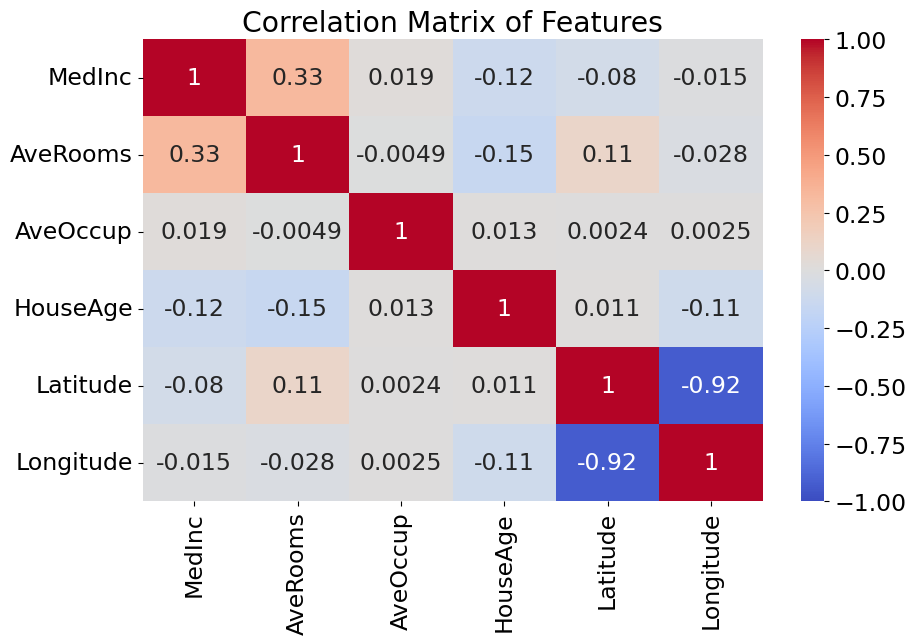

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select multiple features for the correlation check
X_all = df[['MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'Latitude', 'Longitude']]

# Calculate correlation matrix
corr_matrix = X_all.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

# Note that correlation between Latitude and Longitude is coming from geographical location of California

array([[<Axes: xlabel='MedInc', ylabel='MedInc'>,
        <Axes: xlabel='HouseAge', ylabel='MedInc'>,
        <Axes: xlabel='AveRooms', ylabel='MedInc'>,
        <Axes: xlabel='AveBedrms', ylabel='MedInc'>,
        <Axes: xlabel='Population', ylabel='MedInc'>,
        <Axes: xlabel='AveOccup', ylabel='MedInc'>,
        <Axes: xlabel='Latitude', ylabel='MedInc'>,
        <Axes: xlabel='Longitude', ylabel='MedInc'>,
        <Axes: xlabel='MedHouseVal', ylabel='MedInc'>],
       [<Axes: xlabel='MedInc', ylabel='HouseAge'>,
        <Axes: xlabel='HouseAge', ylabel='HouseAge'>,
        <Axes: xlabel='AveRooms', ylabel='HouseAge'>,
        <Axes: xlabel='AveBedrms', ylabel='HouseAge'>,
        <Axes: xlabel='Population', ylabel='HouseAge'>,
        <Axes: xlabel='AveOccup', ylabel='HouseAge'>,
        <Axes: xlabel='Latitude', ylabel='HouseAge'>,
        <Axes: xlabel='Longitude', ylabel='HouseAge'>,
        <Axes: xlabel='MedHouseVal', ylabel='HouseAge'>],
       [<Axes: xlabel='MedInc', yl

<Figure size 1200x1200 with 0 Axes>

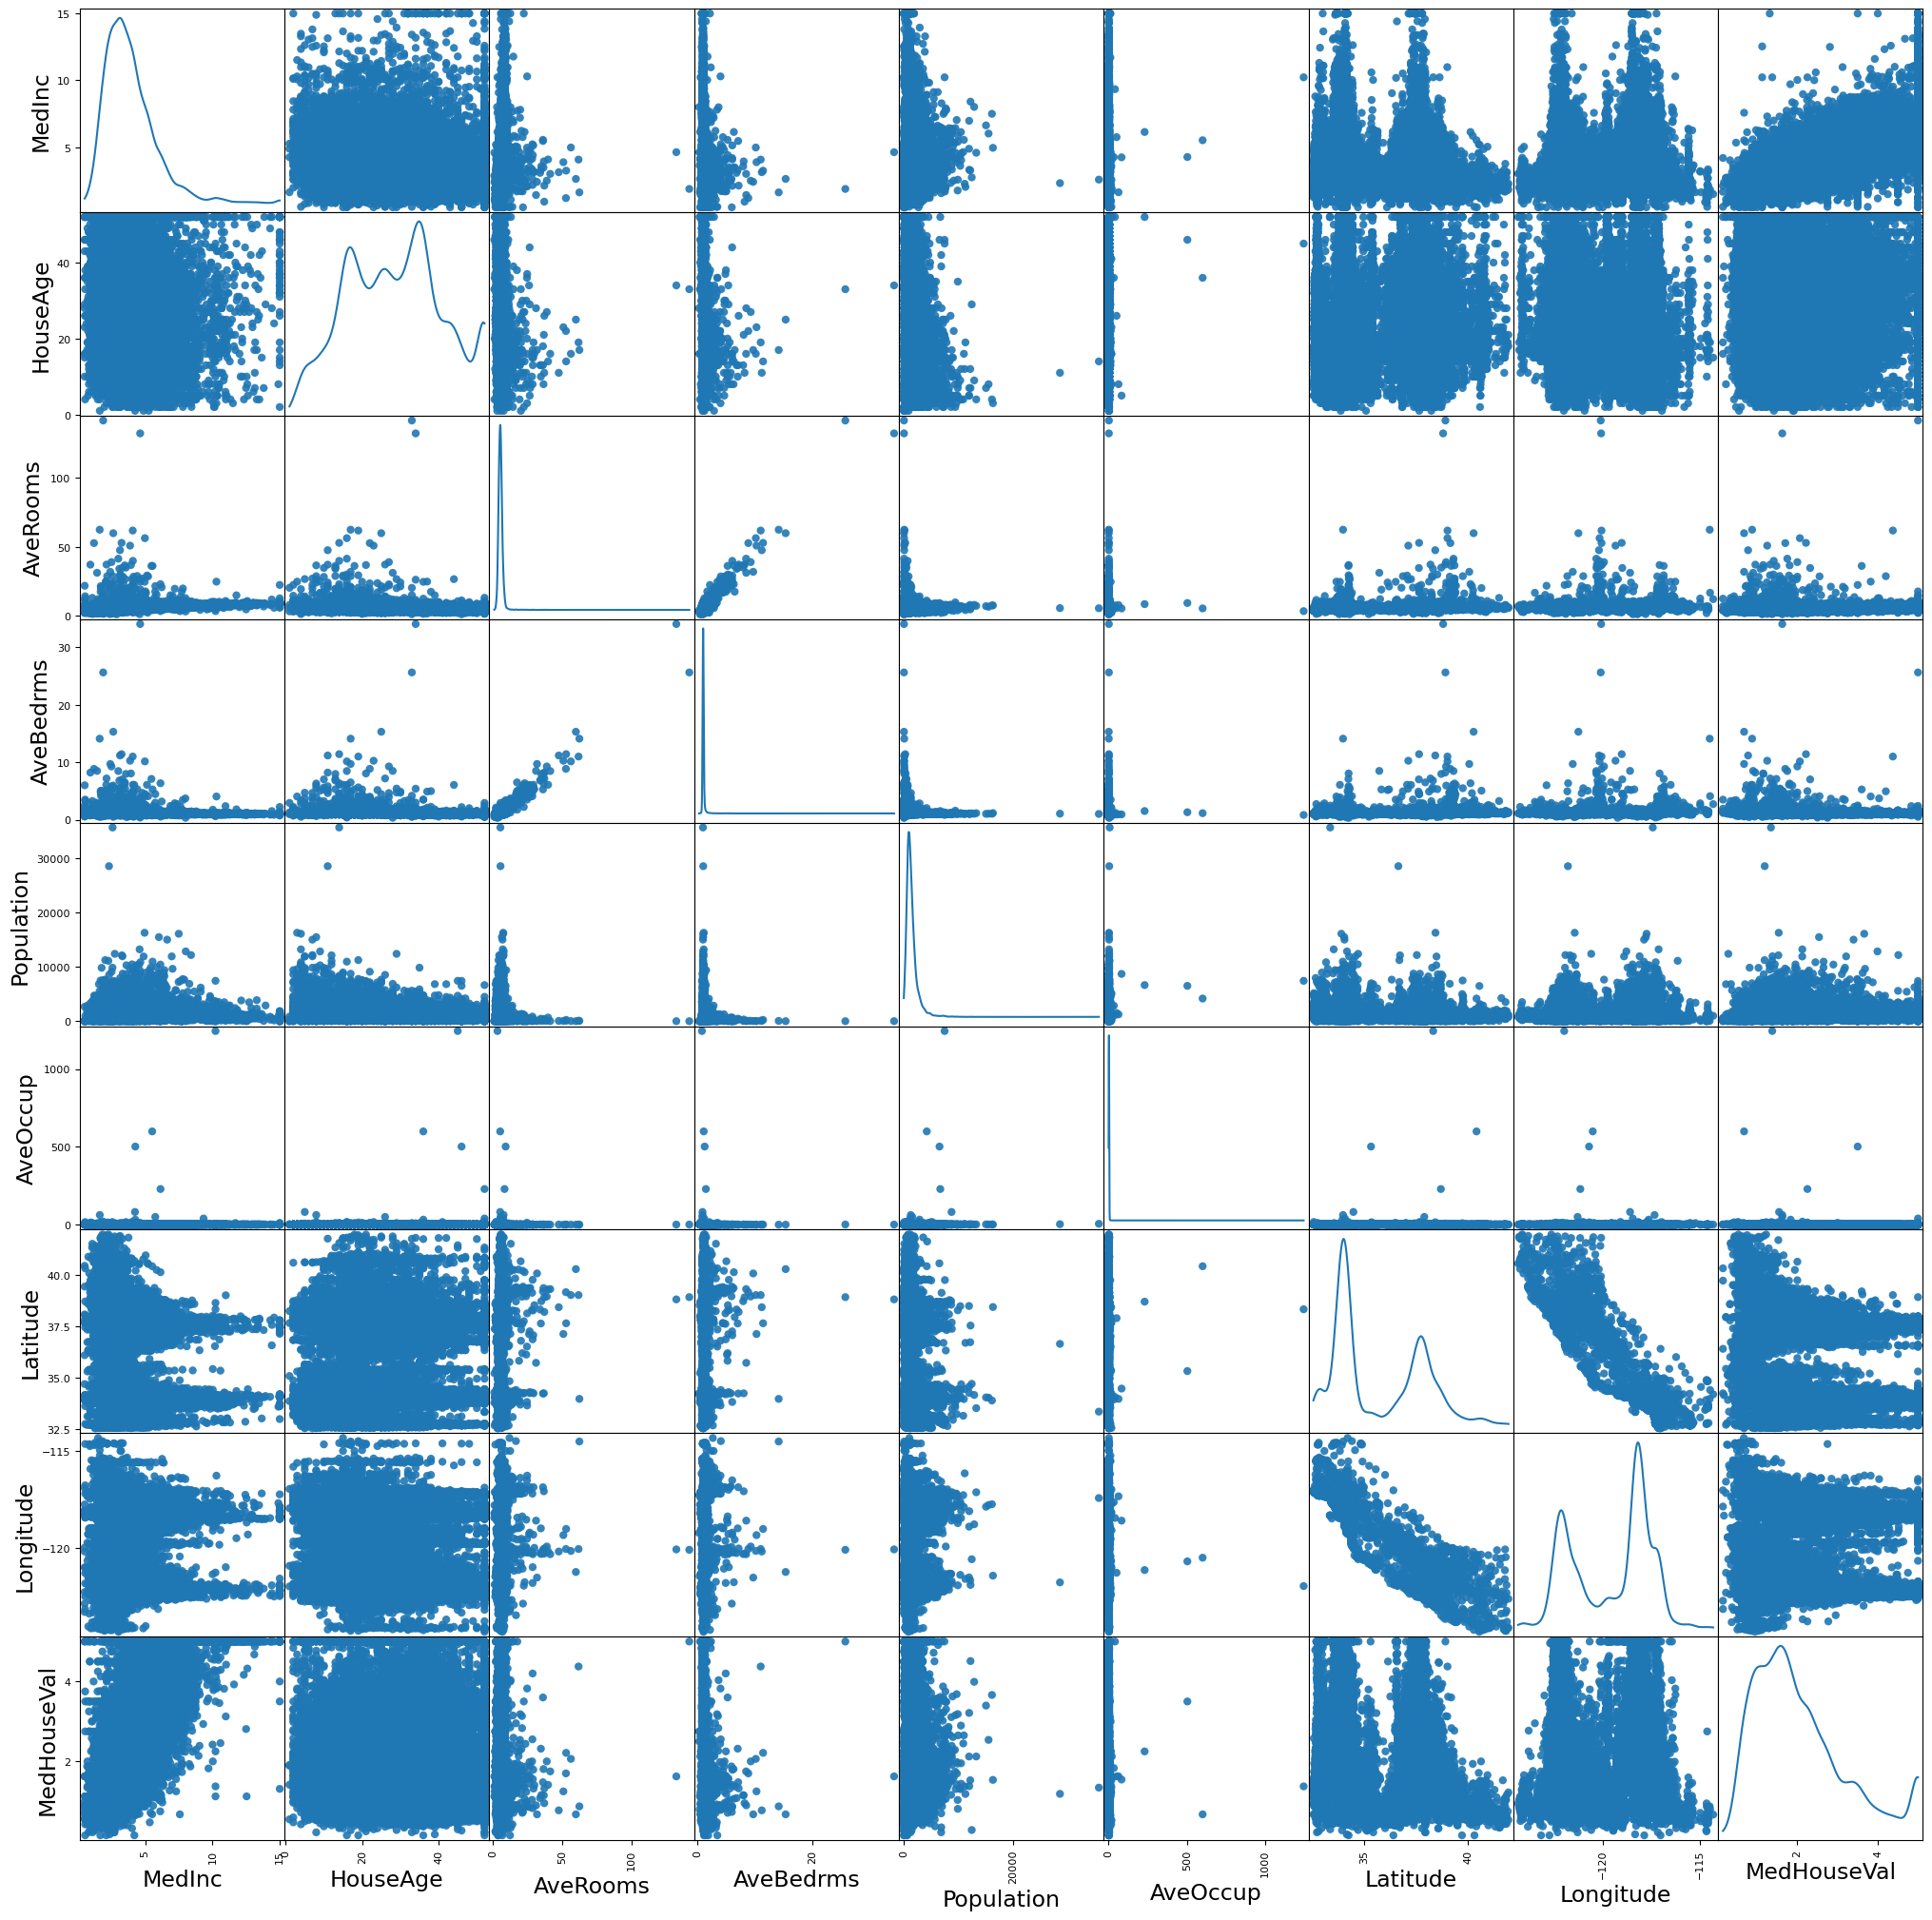

In [9]:
#display scatter_matrix also
fig = plt.figure()
scatter_matrix(df,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o")

## Relevant Metrics

### 1. Residual Sum of Squares (RSS)

$$
RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:

$$ y_i \text{ is the actual value} $$

$$ \hat{y}_i \text{ is the predicted value} $$

$$ n \text{ is the number of observations} $$

---

### 2. Residual Standard Error (RSE)

$$
RSE = \sqrt{\frac{RSS}{n - p - 1}}
$$

Where:

$$ RSS \text{ is the Residual Sum of Squares} $$

$$ n \text{ is the number of observations} $$

$$ p \text{ is the number of predictors (excluding the intercept)} $$

---

### 3. t-statistic

$$
t = \frac{\hat{\beta_j}}{SE(\hat{\beta_j})}
$$

Where:

$$ \hat{\beta_j} \text{ is the estimated coefficient for predictor } j $$

$$ SE(\hat{\beta_j}) \text{ is the standard error of the estimated coefficient for predictor } j $$

---

### 4. p-value

$$
p = 2 \cdot (1 - T(\lvert t \rvert, df))
$$

Where:

$$ t \text{ is the t-statistic} $$

$$ df \text{ is the degrees of freedom, calculated as } n - p - 1 $$

$$ T \text{ is the CDF of the t-distribution} $$



<span style="color:red">Task 1: Fill the missing parts (#TODO) of metric computations</span> (1 Point Each, 3 Points)


In [10]:
def compute_rss(y, y_pred):
    """
    Compute Residual Sum of Squares (RSS)
    y: array of true target values
    y_pred: array of predicted target values
    """
    return np.sum((y - y_pred) ** 2)    


def compute_rse(y, y_pred, n, p):
    """
    Compute Residual Standard Error (RSE)
    y: array of true target values
    y_pred: array of predicted target values
    n: number of observations
    p: number of predictors
    """
    rss = compute_rss(y, y_pred)
    return np.sqrt(rss / (n - p - 1))

def compute_pvalue(X, y, y_pred):
    '''
    Compute p-values for the coefficients of a linear regression model.
    
    X: array of features
    y: array of true target values
    y_pred: array of predicted target values
    return: p-values for each feature
    '''
    n, p = X.shape  # Number of observations (n) and number of predictors (p)
    
    # Compute RSS and RSE
    rss = compute_rss(y, y_pred)
    rse = compute_rse(y, y_pred, n, p)
    
    # # Add intercept (constant term) to the design matrix X
    X = np.c_[np.ones(n), X]
    
    # Calculate (X^T X)^-1
    XTX_inv = np.linalg.inv(np.dot(X.T, X))
    
    # Compute standard error (SE) for each coefficient
    se = np.sqrt(np.diagonal(rse ** 2 * XTX_inv))
    
    # Fit the model to compute the coefficients (betas)
    beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]
    
    # Compute t-statistics for each coefficient
    t_stats = beta_hat / se
    
    # degrees_of_freedom = #TODO calculate the degrees of freedom
    degrees_of_freedom = n - p - 1

    # Compute p-values
    p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), df=degrees_of_freedom))
    
    return p_values


## Linear Regression with single predictor 

In [11]:
# Select features and target
X = df[['AveRooms']]
#z-normalize the data for each column
X = (X - X.mean()) / X.std()
y = df['MedHouseVal']

# Split the data into training and testing sets (80% training, 20% testing) with a fixing seed that ensures same split every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)

# Create a linear regression model
model_1 = LinearRegression()

# Train the model
model_1.fit(X_train, y_train)

# Get the coefficients
print(f"Intercept (β0): {model_1.intercept_}")
print(f"Coefficients (β1, β2): {model_1.coef_}")

#Compute RSS for training data
y_pred = model_1.predict(X_train)

# Compute RSS
rss = compute_rss(y_train, y_pred)

# Calculate R-squared
r_squared_all = model_1.score(X_train, y_train)

# Compute the p-value
p_value = compute_pvalue(X_train, y_train, y_pred)

# Display the coefficients and p-values in a DataFrame
coefficients = np.concatenate([[model_1.intercept_], model_1.coef_])
p_values = np.concatenate([ p_value])

display(pd.DataFrame(pd.DataFrame({'features': ['intercept'] + list(X.columns), 'coefficients': coefficients, 'p-values': p_values})))
print(f"RSS (test data): {rss}")
print(f"R-squared (test data): {r_squared_all}")



Intercept (β0): 2.071946937378876
Coefficients (β1, β2): [0.18323882]


/home/zbarba/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/zbarba/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/zbarba/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/zbarba/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(

,features,coefficients,p-values
0,intercept,2.071947,0.0
1,AveRooms,0.183239,0.0


RSS (test data): 21518.467257765213
R-squared (test data): 0.025117453148833846


<span style="color:red">Task 2: Use 'MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'Latitude', 'Longitude' as predictors.</span> (2 Points)


In [12]:
X_all = df[['MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'Latitude', 'Longitude']]
y = df['MedHouseVal']

# Split the data into training and testing sets (80% training, 20% testing) with a fixing seed that ensures same split every time
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)
independent_scaler = StandardScaler()
X_train_all = independent_scaler.fit_transform(X_train_all)
X_test_all = independent_scaler.transform(X_test_all)

# Fit the linear regression model
model_2 = LinearRegression()
model_2.fit(X_train_all, y_train_all)

# Predictions on the test set
y_pred_all = model_2.predict(X_test_all)

#Code this part
rss = compute_rss(y_test_all, y_pred_all)

# Calculate R-squared
r_squared_all = model_2.score(X_test_all, y_test_all)

# Compute the p-value
p_value = compute_pvalue(X_test_all, y_test_all, y_pred_all)

# Display the coefficients and p-values in a DataFrame
coefficients = np.concatenate([[model_2.intercept_], model_2.coef_])
p_values = np.concatenate([ p_value])

# pd.DataFrame({'features': ['intercept'] + list(X_all.columns), 'coefficients': coefficients, 'p-values': p_values})
display(pd.DataFrame({'features': ['intercept'] + list(X_all.columns), 'coefficients': coefficients, 'p-values': p_values}))
print(f"RSS (test data): {rss}")
print(f"R-squared (test data): {r_squared_all}")


/home/zbarba/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/zbarba/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/zbarba/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/zbarba/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(

,features,coefficients,p-values
0,intercept,2.071947,0.000000
1,MedInc,0.708366,0.000000
2,AveRooms,0.045937,0.010799
3,AveOccup,-0.037746,0.000000
4,HouseAge,0.124500,0.000000
5,Latitude,-0.977368,0.000000
6,Longitude,-0.931079,0.000000


RSS (test data): 2259.4509562626745
R-squared (test data): 0.5823077951522643


<span style="color:red">Task 3: Try model performance on different K values by using the code below, observe the effect of very large K values which one would you pick?</span> (3 Points)


In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X_all = df[['MedInc', 'AveRooms', 'AveOccup', 'HouseAge', 'Latitude', 'Longitude']]
X_all = (X_all - X_all.mean()) / X_all.std()
y = df['MedHouseVal']


# Split the data into training and testing sets (80% training, 20% testing) with a fixing seed that ensures same split every time
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)
independent_scaler = StandardScaler()
X_train_all = independent_scaler.fit_transform(X_train_all)
X_test_all = independent_scaler.transform(X_test_all)

#Fit the KNN model (you can tune 'n_neighbors' for optimal performance)
knn_model = KNeighborsRegressor(n_neighbors=1)
knn_model.fit(X_train_all, y_train_all)

#Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_all)

#Compute RSS and R-squared
rss_knn = compute_rss(y_test, y_pred_knn)
r2_knn = r2_score(y_test_all, y_pred_knn)
print(f"KNN Model RSS: {rss_knn}")
print(f"KNN Model R-squared: {r2_knn}")


/home/zbarba/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/zbarba/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/zbarba/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/zbarba/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(

KNN Model RSS: 2377.7160159583
KNN Model R-squared: 0.560444787502643


/home/zbarba/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/zbarba/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


<span style="color:red">Task 4: Comment on R-squared and RSS values</span> (1 Point)

TODO

## Visualize results

/home/zbarba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zbarba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zbarba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zbarba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

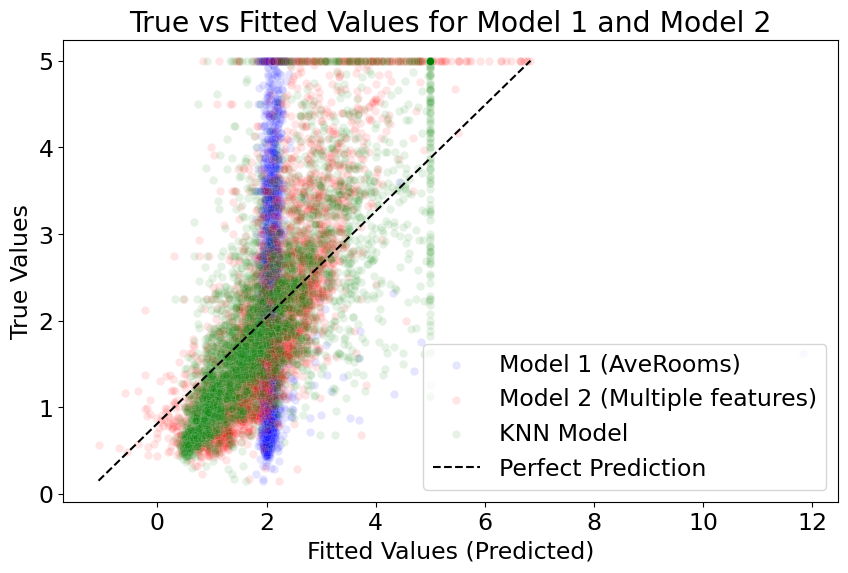

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error


# Make predictions on the test set for the first model (only AveRooms)
y_pred = model_1.predict(X_test)

# Make predictions on the test set for the second model (multiple features)
y_pred_all = model_2.predict(X_test_all)

# Make predictions using the KNN model
y_pred_knn = knn_model.predict(X_test_all)  # Use scaled features for KNN


plt.figure(figsize=(10, 6))

# Model 1: True vs Fitted (only AveRooms)
sns.scatterplot(x=y_pred, y=y_test, color='blue', label='Model 1 (AveRooms)', alpha=0.1)

# Model 2: True vs Fitted (multiple features)
sns.scatterplot(x=y_pred_all, y=y_test_all, color='red', label='Model 2 (Multiple features)', alpha=0.1)

# KNN Model: True vs Fitted
sns.scatterplot(x=y_pred_knn, y=y_test_all, color='green', label='KNN Model', alpha=0.1)

# Add perfect prediction line
plt.plot([min(y_pred_all), max(y_pred_all)], [min(y_test_all), max(y_test_all)], color='black', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('True Values')
plt.title('True vs Fitted Values for Model 1 and Model 2')
plt.legend()
plt.show()


<span style="color:red">Task 5: Compute residuals</span> (1 Point)

/home/zbarba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zbarba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zbarba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zbarba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

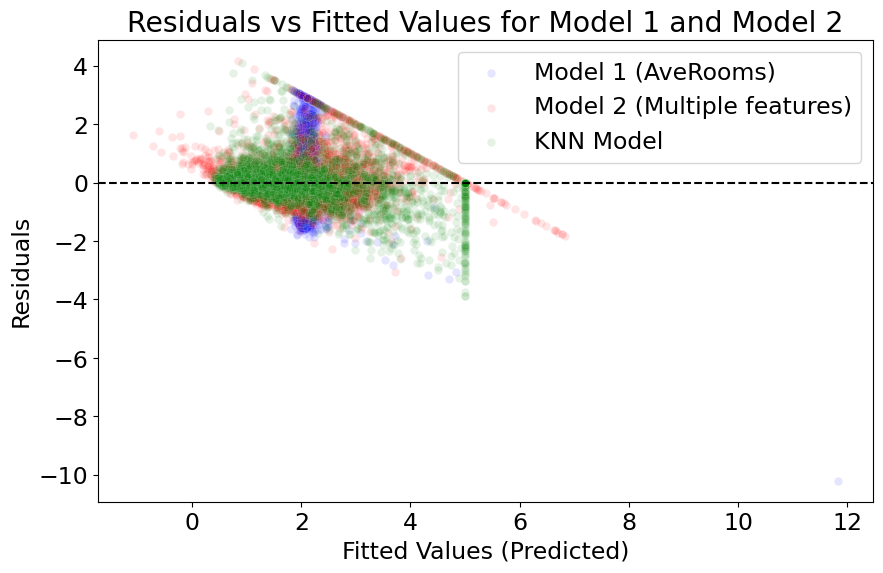

In [23]:
### 2. Residuals vs Fitted

# Compute residuals #TODO
residuals_model_1 = y_test - y_pred
residuals_model_2 = y_test_all - y_pred_all
residuals_knn = y_test_all - y_pred_knn

plt.figure(figsize=(10, 6))

# Residuals vs Fitted for Model 1 (only AveRooms)
sns.scatterplot(x=y_pred, y=residuals_model_1, color='blue', label='Model 1 (AveRooms)', alpha=0.1)

# Residuals vs Fitted for Model 2 (multiple features)
sns.scatterplot(x=y_pred_all, y=residuals_model_2, color='red', label='Model 2 (Multiple features)', alpha=0.1)

# Residuals vs Fitted for KNN Model
sns.scatterplot(x=y_pred_knn, y=residuals_knn, color='green', label='KNN Model', alpha=0.1)

# Add horizontal line at 0 (perfect prediction residual)
plt.axhline(0, color='black', linestyle='--')

# Labels and title
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values for Model 1 and Model 2')
plt.legend()
plt.show()
